In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### I will be using my KMeans and scikit-learn's KMeans algorithms to cluster college admission applications and see if the clusters might indicate admission or rejection into university

In [2]:
def kmeans(df,k=3,epoch = 1):
    import random
    
    def euclid_squared_distance(pt1,pt2):
        return (pt1 - pt2)**2
    
    def select_k_points(dataframe = df,k = k):
        centroid_dataframe = pd.DataFrame(columns = dataframe.columns)
        centroid_indices = []
        for i in range(k):
            while True:
                rand_ind = random.choice(list(dataframe.index))
                if rand_ind not in centroid_indices:
                    centroid_indices.append(rand_ind)
                    break
            centroid_dataframe = centroid_dataframe.append(pd.DataFrame(data = [list(dataframe.loc[rand_ind,:])],columns = dataframe.columns,index = [rand_ind]))
            for row_num,ind in enumerate(list(centroid_dataframe.index)):
                centroid_dataframe.loc[ind,'Cluster'] = int(row_num)
        return centroid_dataframe
    
#     def kmeans_pp(dataframe = df,k = k):
#         centroid_dataframe = pd.DataFrame(columns = dataframe.columns)
#         centroid_indices = []
#         rand_ind = random.choice(list(dataframe.index))
#         centroid_indices.append(rand_ind)
#         centroid_dataframe.loc[rand_ind,:] = dataframe.iloc[rand_ind,:]
        
#         for i in range(k-1):
#             for row in dataframe.index:
#                 sqd_diffs_df = pd.DataFrame(columns = dataframe.columns)
#                 for cent_ind in centroid_indices:                
#                     sqd_diffs_df.loc[cent_ind,:] = (centroid_dataframe.loc[cent_ind,:] - dataframe.loc[row,:]) ** 2
#                     sqd_diffs_df['Sum_Squared_Diffs'] = sqd_diffs_df.sum(axis = 1)
#                 min_sqd_diffs = sqd_diffs_df['Sum_Squared_Diffs'].min()
#                 sqd_diffs_df=sqd_diffs_df[sqd_diffs_df['Sum_Squared_Diffs'] = 8]

            
    df['Cluster'] = np.nan
    
    centroid_df = select_k_points()

    centroid_indices = list(centroid_df.index)
    
    

    def one_iteration_k_means(dataframe = df,centroid_dataframe = centroid_df,cluster_col = 'Cluster'):
        for row in dataframe.index:
            sqd_diffs_df = pd.DataFrame(columns = centroid_dataframe.drop(cluster_col,axis = 1).columns)
            for cent_ind in centroid_indices:
                sqd_diffs_df.loc[cent_ind,:] = (centroid_dataframe.drop(cluster_col,axis = 1).loc[cent_ind,:] - dataframe.drop(cluster_col,axis = 1).loc[row,:]) ** 2 
            sqd_diffs_df['Sum_Sqd_Diffs'] = sqd_diffs_df.sum(axis = 1)
            for row_num,ind in enumerate(list(sqd_diffs_df.index)):
                sqd_diffs_df.loc[ind,'Cluster'] = int(row_num)

            smallest_ssd = sqd_diffs_df['Sum_Sqd_Diffs'].min()

            smallest_ssd_df = sqd_diffs_df[sqd_diffs_df['Sum_Sqd_Diffs'] == smallest_ssd]

            closest_centroid = pd.DataFrame(data = [smallest_ssd_df.loc[smallest_ssd_df.index[0],:].values],columns = list(sqd_diffs_df.columns),index = smallest_ssd_df.index)

            closest_centroid_ind = list(closest_centroid.index)[0]

            df.loc[row,cluster_col] = centroid_dataframe.loc[closest_centroid_ind,cluster_col]

            for row_cent in list(centroid_dataframe.index):
                
                if row_cent == closest_centroid_ind:
                    for col in list(centroid_dataframe.drop(cluster_col,axis = 1).columns):
                        centroid_dataframe.loc[row_cent,col] = (centroid_dataframe.loc[row_cent,col] + df.loc[row,col])/2
                        
        return centroid_dataframe
    
    for iteration in range(epoch):
        centroid_df = one_iteration_k_means() 

    return df

In [5]:
def normalize(df,cat_class = None):
    """
    This function takes in a dataframe as a parameter and returns the same dataframe with all the features normalized between 0 and 1 using rescaling (min-max normalization)
    """
    l_min = []
    l_max = []
    if cat_class == None:
        for col in df.columns:
            l_min.append(df.describe()[col]['min'])
            l_max.append(df.describe()[col]['max'])
        
        t_min = list(zip(df.columns, l_min))
        t_max = list(zip(df.columns, l_max))
 

    else:
        for col in df.drop(cat_class,axis = 1).columns:
            l_min.append(df.describe()[col]['min'])
            l_max.append(df.describe()[col]['max'])

        t_min = list(zip(df.drop(cat_class,axis = 1).columns, l_min))
        t_max = list(zip(df.drop(cat_class,axis = 1).columns, l_max))
    
   
    d_min = {}
    for col,val in t_min:
        d_min[col]=val
    
    d_max = {}
    for col,val in t_max:
        d_max[col]=val
    
    df_copy = df.copy()
    for key in d_min.keys():
        df_copy[key] = df_copy[key].apply(lambda x: (x - d_min[key])/ (d_max[key] - d_min[key]))
    
    return df_copy

### Test Dataset

In [6]:
test_df = pd.DataFrame(data = [[80,90],[90,73],[84,78],[85,76],[92,67],[87,78],[89,97],[88,76],[38,67],[89,77],[90,80],[89,77],[40,65],[88,21],[82,10],[90,20],[40,20],[42,25],[37,22],[42,29],[40,13],[37,25],[45,19],[50,27],[43,20],[48,28],[47,11],[49,9],[77,19],[69,18],[77,35],[79,97],[37,78],[98,40],[55,85],[84,21],[79,5],[80,28],[67,37],[73,21],[78,20],[97,10],[47,60],[69,17],[73,19],[98,18],[90,26],[50,77],[53,89],[98,32],[53,79],[84,18],[89,7],[78,30],[57,77],[89,21],[76,20],[99,10],[49,65],[40,76],[47,80],[39,17],[33,89],[48,98],[40,26],[40,79],[33,89],[48,82],[93,79],[84,88],[89,87],[39,20],[37,27],[46,21],[46,20],[39,100],[43,75],[40,86],[88,97],[90,77],[84,73],[83,77],[92,87],[89,98],[91,97],[88,73],[98,92],[89,89],[100,90],[80,72],[37,20],[84,91]],columns = ['Height','Age'])

In [7]:
test_df

,Height,Age
0,80,90
1,90,73
2,84,78
3,85,76
4,92,67
5,87,78
6,89,97
7,88,76
8,38,67
9,89,77


In [8]:
scaled_test_df = normalize(test_df)

In [9]:
scaled_test_df.head()

,Height,Age
0,0.701493,0.894737
1,0.850746,0.715789
2,0.761194,0.768421
3,0.776119,0.747368
4,0.880597,0.652632


In [10]:
kmeans_df = kmeans(scaled_test_df,k = 4)

In [11]:
kmeans_df.head()

,Height,Age,Cluster
0,0.701493,0.894737,1.0
1,0.850746,0.715789,1.0
2,0.761194,0.768421,1.0
3,0.776119,0.747368,1.0
4,0.880597,0.652632,1.0


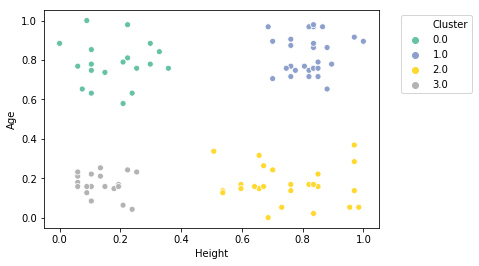

In [12]:
sns.scatterplot(data = kmeans_df,x = 'Height',y = 'Age',hue = 'Cluster',palette='Set2')
plt.legend(bbox_to_anchor = (1.05,1))

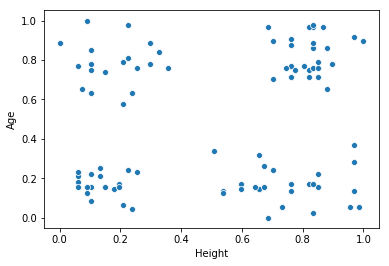

In [14]:
sns.scatterplot(data = scaled_test_df,x = 'Height',y = 'Age')

### College Dataset

In [15]:
college = pd.read_csv(r'C:\Users\ssiva\Downloads\Python-Data-Science-and-Machine-Learning-Bootcamp\Machine Learning Sections\K-Means-Clustering\College_Data')

In [16]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [17]:
scaled_college = normalize(college.drop('Unnamed: 0',axis = 1),cat_class= 'Private')

In [18]:
scaled_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,Yes,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,Yes,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,Yes,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,Yes,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


In [19]:
kmeans_college_df = kmeans(df = scaled_college[['F.Undergrad','Outstate']].loc[:777,:],k = 2,epoch = 1)

In [20]:
kmeans_college_df.head()

,F.Undergrad,Outstate,Cluster
0,0.087164,0.263430,1.0
1,0.080752,0.513430,1.0
2,0.028473,0.460227,1.0
3,0.011776,0.548554,1.0
4,0.003492,0.269628,1.0


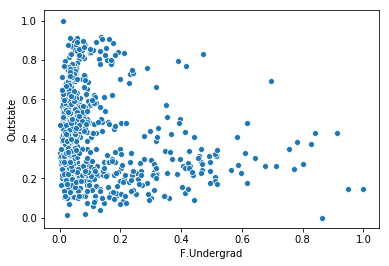

In [21]:
sns.scatterplot(data = kmeans_college_df,x = 'F.Undergrad',y = 'Outstate')

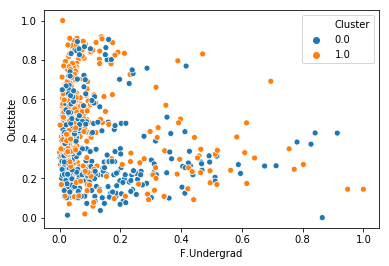

In [22]:
sns.scatterplot(data = kmeans_college_df,x = 'F.Undergrad',y = 'Outstate',hue = 'Cluster')

In [23]:
scaled_college['Not_Private'] = college['Private'].apply(lambda priv: 0 if priv == 'Yes' else 1)

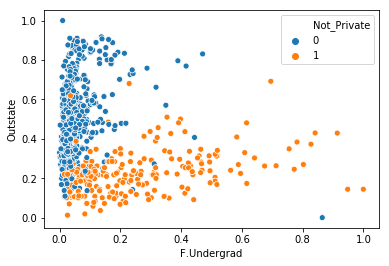

In [24]:
sns.scatterplot(data = scaled_college,x = 'F.Undergrad', y = 'Outstate', hue = 'Not_Private')

In [25]:
scaled_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Not_Private
0,Yes,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963,0
1,Yes,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926,0
2,Yes,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407,0
3,Yes,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704,0
4,Yes,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296,0


In [26]:
scaled_college.drop('Private',axis = 1,inplace = True)

In [27]:
scaled_college.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Not_Private
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963,0
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926,0
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407,0
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704,0
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296,0


In [28]:
from sklearn.cluster import KMeans

In [29]:
kmns = KMeans(n_clusters=2)

In [30]:
kmns.fit(scaled_college.drop('Not_Private',axis = 1),)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

### Sci-kit Learn's KMeans algorithm's accuracy

In [32]:
print(confusion_matrix(scaled_college['Not_Private'],kmns.labels_))

[[250 315]
 [ 42 170]]


In [33]:
print(classification_report(scaled_college['Not_Private'],kmns.labels_))

              precision    recall  f1-score   support

           0       0.86      0.44      0.58       565
           1       0.35      0.80      0.49       212

    accuracy                           0.54       777
   macro avg       0.60      0.62      0.54       777
weighted avg       0.72      0.54      0.56       777



### My Algorithm's accuracy

In [37]:
print(confusion_matrix(scaled_college['Not_Private'],kmeans_college_df['Cluster']))

[[249 316]
 [140  72]]


In [38]:
print(classification_report(scaled_college['Not_Private'],kmeans_college_df['Cluster']))

              precision    recall  f1-score   support

           0       0.64      0.44      0.52       565
           1       0.19      0.34      0.24       212

    accuracy                           0.41       777
   macro avg       0.41      0.39      0.38       777
weighted avg       0.52      0.41      0.45       777

